<a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

출처: 파이썬 머신러닝 완벽 가이드, 권철민

In [1]:
url = 'https://raw.githubusercontent.com/SeWonKwon/ML_training/main/Kaggle/Pima%20Indians%20Diabetes/data/diabetes.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [3]:
diabetes_data = pd.read_csv(url)
print(diabetes_data.Outcome.value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 필요 함수 정의

In [5]:
def plot_conf_mat(conf_mat):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center',fontsize=19)
    
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

In [6]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    plot_conf_mat(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1_score:{3:.4f},\
            AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [7]:
def precision_recall_curve_plot(y_test = None, pred_proba_c1=None):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],
             linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],
             linestyle='-.', label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision & Recall')
    plt.legend()
    plt.grid()
    plt.show()

## 데이터 준비

In [8]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 156, stratify=y)



## model 생성및 학습

In [9]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
pred_proba_c1 = pred_proba

C:\Users\N\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


오차 행렬


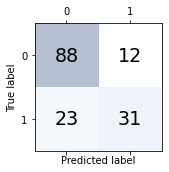

정확도:0.7727, 정밀도:0.7209, 재현율:0.5741, F1_score:0.6392,            AUC: 0.7919


In [10]:
get_clf_eval(y_test, pred, pred_proba)

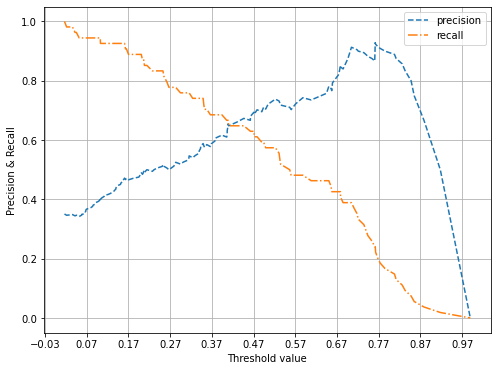

In [11]:
precision_recall_curve_plot(y_test, pred_proba_c1)

## 모델 검토 및 수정

In [12]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


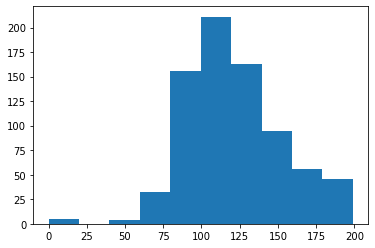

In [13]:
plt.hist(diabetes_data.Glucose, bins=10);

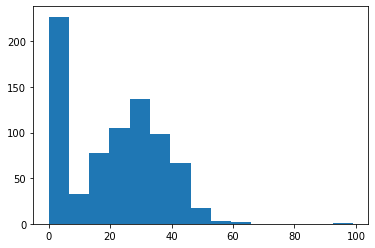

In [14]:
plt.hist(diabetes_data.SkinThickness, bins=15);

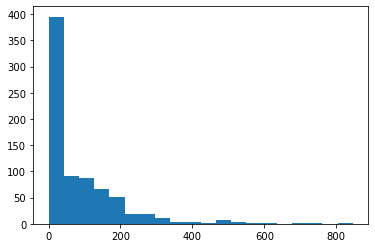

In [15]:
plt.hist(diabetes_data.Insulin, bins=20);

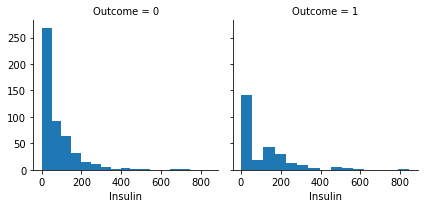

In [16]:
g = sns.FacetGrid(data=diabetes_data, col='Outcome')
g.map(plt.hist, 'Insulin', bins=15);

In [17]:
# 0값을 검사할 피처명 리스트 객체 설정

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수

total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출 및 비율계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100* zero_count/total_count))
    


Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [18]:
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

## 모델 재생성 ( + 전처리, scaler)

오차 행렬


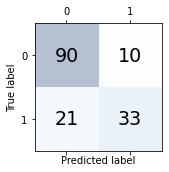

정확도:0.7987, 정밀도:0.7674, 재현율:0.6111, F1_score:0.6804,            AUC: 0.8433


In [19]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# 표준화

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state= 156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test=y_test, pred=pred, pred_proba=pred_proba)

조금 오른것을 확인 할수 있따. 

In [20]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [24]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)
        print('----------------------')

임곗값: 0.3
오차 행렬


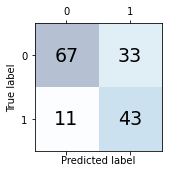

정확도:0.7143, 정밀도:0.5658, 재현율:0.7963, F1_score:0.6615,            AUC: 0.8433
----------------------
임곗값: 0.33
오차 행렬


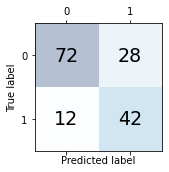

정확도:0.7403, 정밀도:0.6000, 재현율:0.7778, F1_score:0.6774,            AUC: 0.8433
----------------------
임곗값: 0.36
오차 행렬


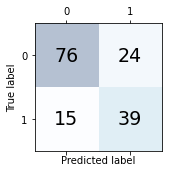

정확도:0.7468, 정밀도:0.6190, 재현율:0.7222, F1_score:0.6667,            AUC: 0.8433
----------------------
임곗값: 0.39
오차 행렬


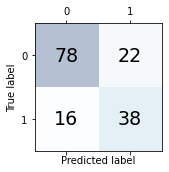

정확도:0.7532, 정밀도:0.6333, 재현율:0.7037, F1_score:0.6667,            AUC: 0.8433
----------------------
임곗값: 0.42
오차 행렬


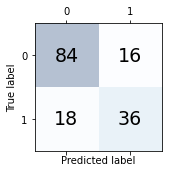

정확도:0.7792, 정밀도:0.6923, 재현율:0.6667, F1_score:0.6792,            AUC: 0.8433
----------------------
임곗값: 0.45
오차 행렬


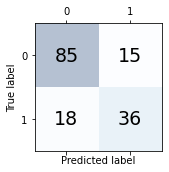

정확도:0.7857, 정밀도:0.7059, 재현율:0.6667, F1_score:0.6857,            AUC: 0.8433
----------------------
임곗값: 0.48
오차 행렬


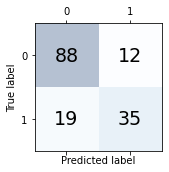

정확도:0.7987, 정밀도:0.7447, 재현율:0.6481, F1_score:0.6931,            AUC: 0.8433
----------------------
임곗값: 0.5
오차 행렬


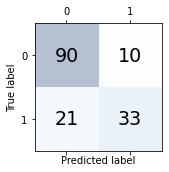

정확도:0.7987, 정밀도:0.7674, 재현율:0.6111, F1_score:0.6804,            AUC: 0.8433
----------------------


In [25]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

오차 행렬


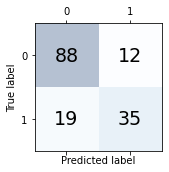

정확도:0.7987, 정밀도:0.7447, 재현율:0.6481, F1_score:0.6931,            AUC: 0.8433


In [23]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

    


F1_score와 정확도가 가장 높은 모델